In [115]:
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import warnings

warnings.filterwarnings("ignore")

In [116]:
# Load the style transfer model from TensorFlow Hub
hub_model = hub.load(
    "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
)

In [117]:
# Convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [118]:
# Load and preprocess the image
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [119]:
# Display the image
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

In [131]:
# Set paths to content and style images
content_path = "Images/C3.png"
style_path = "Images/S2.png"

# Alternatively download content and style images
# content_path = tf.keras.utils.get_file(
#     "YellowLabradorLooking_new.jpg",
#     "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg",
# )
# style_path = tf.keras.utils.get_file(
#     "kandinsky5.jpg",
#     "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg",
# )

In [132]:
# Load the content and style images
content_image = load_img(content_path)
style_image = load_img(style_path)

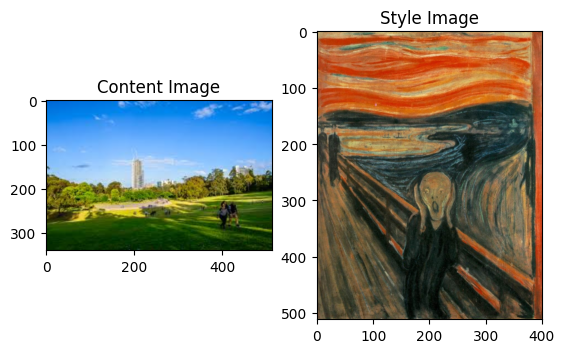

In [133]:
# Display the content and style images
plt.subplot(1, 2, 1)
imshow(content_image, "Content Image")
plt.subplot(1, 2, 2)
imshow(style_image, "Style Image")
plt.show()

In [134]:
# Apply style transfer to the content image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

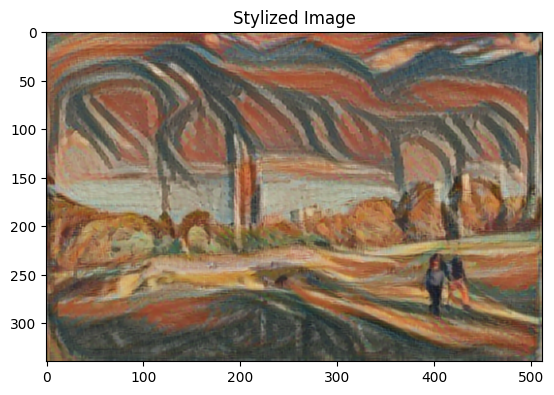

In [135]:
# Display the stylized image
plt.imshow(tensor_to_image(stylized_image))
plt.title("Stylized Image")
plt.show()